# <center> Proposal Plan </center>

**Authors** Group 1, Proposal (Fiona Wang, Jack Fan, William Surya, Ria Ji)

**Abstract**   

## 1. Introduction

### 1.1 Background

Background information on the topic:

A growing body of research suggests that a person's life expectancy may be affected by a number of essential external factors, including but not limited to alcohol consumption level(the rate of people in a country drinking alcohol or not), regional differences, developing or developed country, BMI(body mass index), population, schooling(the education level of the population).

Because where people live and work, what kind of lifestyle they are having, big or small the population is(resources allocated per capita), and their educational level, all affect their health, further speaking, they will affect their life expectancy over time.

### 1.2 Question

Through this group project, we wish to answer the question:  

We want to determine which factors predicts one's' life expectancy the best, using forward/backward generative models, and then perform prediction of life expectancy using regression model. Life Expectancy vs Whatever Factors
Additive/ Interaction model, multicollinearity
Prediction using Linear Model
Testing performance of model using training vs testing dataset

What are the predicting variables actually affecting the life expectancy?

### 1.3 Dataset


To answer the question mentioned above, we will use the Life Expectancy(WHO) Data Set. 

This dataset was collected from WHO and United Nations websites by Kumar Rajarshi, Deeksha Russell and Duan Wang. It is consist of a few predicting variables, which were mainly divided into several broad categories: Immunization related factors, Mortality factors, Economical factors and Social factors(Kumar., 2017).

## 2. Preliminary Results

### 2.1 Data Wrangling

In [1]:
# install.packages("package_name")
# run this line of code to install the packages if they are not installed on your machine
#install.packages("hardhat")
#install.packages("tidymodels")

# Load required packages
library("GGally")
library("ggplot2")
library("janitor")
library("plyr")
library("tidyverse")
library("reshape")
library("leaps")
library("tidymodels")

Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
✔ purrr   0.3.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()   masks plyr::arrange()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::id()        masks plyr::id()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::mutate()    masks plyr::mutate()
✖ dplyr::rename()    masks plyr::rename

We'll start by importing the dataset, loading it into a dataframe and inspecting the results. The original dataset can be found [here](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who).

In [2]:
le = read_csv("https://shorturl.at/FV478")

Rows: 2938 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Country, Status
dbl (20): Year, Life expectancy, Adult Mortality, infant deaths, Alcohol, pe...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
# In order to display all column names, we need to change the max # of cols displayed
options(repr.matrix.max.cols=22, repr.matrix.max.rows=37)

In [4]:
# preview the first and last 3 rows of our data
head(le, n = 3)
tail(le, n = 3)

Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2015,Developing,65.0,263,62,0.01,71.27962,65,1154,19.1,83,6,8.16,65,0.1,584.2592,33736494,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271,64,0.01,73.52358,62,492,18.6,86,58,8.18,62,0.1,612.6965,327582,17.5,17.5,0.476,10.0
Afghanistan,2013,Developing,59.9,268,66,0.01,73.21924,64,430,18.1,89,62,8.13,64,0.1,631.7450,31731688,17.7,17.7,0.470,9.9


Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Zimbabwe,2002,Developing,44.8,73,25,4.43,0,73,304,26.3,40,73,6.53,71,39.8,57.34834,125525,1.2,1.3,0.427,10.0
Zimbabwe,2001,Developing,45.3,686,25,1.72,0,76,529,25.9,39,76,6.16,75,42.1,548.58731,12366165,1.6,1.7,0.427,9.8
Zimbabwe,2000,Developing,46.0,665,24,1.68,0,79,1483,25.5,39,78,7.10,78,43.5,547.35888,12222251,11.0,11.2,0.434,9.8


As described in [[3.4 Tidy data, 1]](https://datasciencebook.ca/wrangling.html#tidy-data), a cleaned dataset should have the following attributes:   
> 1. each row is a single observation,   
> 2. each column is a single variable, and   
> 3. each value is a single cell (i.e., its entry in the data frame is not shared with another value).   

Our data clearly comes in with a tidy format.

Three steps can be done to improve our data, listed as following: 
- For readibility and naming convention, we will convert variable names into lowercase, and we will replace space in variable names with underscores for the validity of syntax. We can do these with the help of the janitor library.
- Moreover, we will remove `N/A` values if there exists any. 
- Also, we will convert "country" and "status" variables into `factor` type as they are expected to be. 

In [5]:
le = clean_names(le)

In [6]:
le = le %>% 
    mutate(country = as_factor(country)) %>% 
    mutate(status = as_factor(status))

In [7]:
# remove all NAs

total_rows <- le %>% nrow()

print(sprintf("there are %d rows in the data frame",total_rows))

le <- na.omit(le)

print(sprintf("there are %d rows in the data frame", nrow(le)))

[1] "there are 2938 rows in the data frame"
[1] "there are 1649 rows in the data frame"


In [8]:
le = le %>%     
    mutate(country = as_factor(country)) %>%
    mutate(status = as_factor(status))

In [9]:
# review our data
tail(le, n = 3)

country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Zimbabwe,2002,Developing,44.8,73,25,4.43,0,73,304,26.3,40,73,6.53,71,39.8,57.34834,125525,1.2,1.3,0.427,10.0
Zimbabwe,2001,Developing,45.3,686,25,1.72,0,76,529,25.9,39,76,6.16,75,42.1,548.58731,12366165,1.6,1.7,0.427,9.8
Zimbabwe,2000,Developing,46.0,665,24,1.68,0,79,1483,25.5,39,78,7.10,78,43.5,547.35888,12222251,11.0,11.2,0.434,9.8


In [10]:
cor(subset(select(le, -c(country, status))))

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
year,1.000000000,0.05077103,-0.037091782,0.008029128,-0.11336476,0.06955347,0.11489709,-0.053822046,0.005739061,0.01047859,-0.01669880,0.05949278,0.02964059,-0.123404990,0.09642148,0.012566893,0.01975661,0.01412242,0.122891780,0.08873179
life_expectancy,0.050771035,1.00000000,-0.702523062,-0.169073804,0.40271832,0.40963082,0.19993528,-0.068881222,0.542041588,-0.19226530,0.32729440,0.17471764,0.34133123,-0.592236293,0.44132181,-0.022304978,-0.45783819,-0.45750829,0.721082593,0.72763003
adult_mortality,-0.037091782,-0.70252306,1.000000000,0.042450237,-0.17553509,-0.23760989,-0.10522544,-0.003966685,-0.351542478,0.06036503,-0.19985300,-0.08522653,-0.19142876,0.550690745,-0.25503473,-0.015011838,0.27223004,0.28672288,-0.442203288,-0.42117052
infant_deaths,0.008029128,-0.16907380,0.042450237,1.000000000,-0.10621692,-0.09076463,-0.23176894,0.532679832,-0.234425154,0.99690562,-0.15692881,-0.14695112,-0.16187100,0.007711547,-0.09809202,0.671758310,0.46341526,0.46190792,-0.134753863,-0.21437190
alcohol,-0.113364764,0.40271832,-0.175535086,-0.106216917,1.00000000,0.41704736,0.10988939,-0.050110235,0.353396205,-0.10108216,0.24031453,0.21488509,0.24295143,-0.027112636,0.44343279,-0.028880232,-0.40375499,-0.38620819,0.561074332,0.61697481
percentage_expenditure,0.069553468,0.40963082,-0.237609890,-0.090764632,0.41704736,1.00000000,0.01676017,-0.063070789,0.242738243,-0.09215806,0.12862605,0.18387236,0.13481324,-0.095084991,0.95929886,-0.016792141,-0.25503460,-0.25563544,0.402169736,0.42208845
hepatitis_b,0.114897092,0.19993528,-0.105225443,-0.231768937,0.10988939,0.01676017,1.00000000,-0.124799993,0.143301786,-0.24076603,0.46333080,0.11332668,0.58898993,-0.094801971,0.04184950,-0.129722655,-0.12940595,-0.13325099,0.184920970,0.21518159
measles,-0.053822046,-0.06888122,-0.003966685,0.532679832,-0.05011023,-0.06307079,-0.12479999,1.000000000,-0.153245464,0.51750556,-0.05785013,-0.11358274,-0.05860591,-0.003521854,-0.06476759,0.321946377,0.18064151,0.17494622,-0.058277256,-0.11566048
bmi,0.005739061,0.54204159,-0.351542478,-0.234425154,0.35339621,0.24273824,0.14330179,-0.153245464,1.000000000,-0.24213740,0.18626797,0.18946896,0.17629450,-0.210896746,0.26611397,-0.081415982,-0.54701751,-0.55409398,0.510504831,0.55484390
under_five_deaths,0.010478594,-0.19226530,0.060365026,0.996905622,-0.10108216,-0.09215806,-0.24076603,0.517505563,-0.242137398,1.00000000,-0.17116419,-0.14580310,-0.17844819,0.019475927,-0.10033126,0.658679691,0.46478470,0.46228938,-0.148097276,-0.22601262


### 2.2 Explore Correlations

Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”


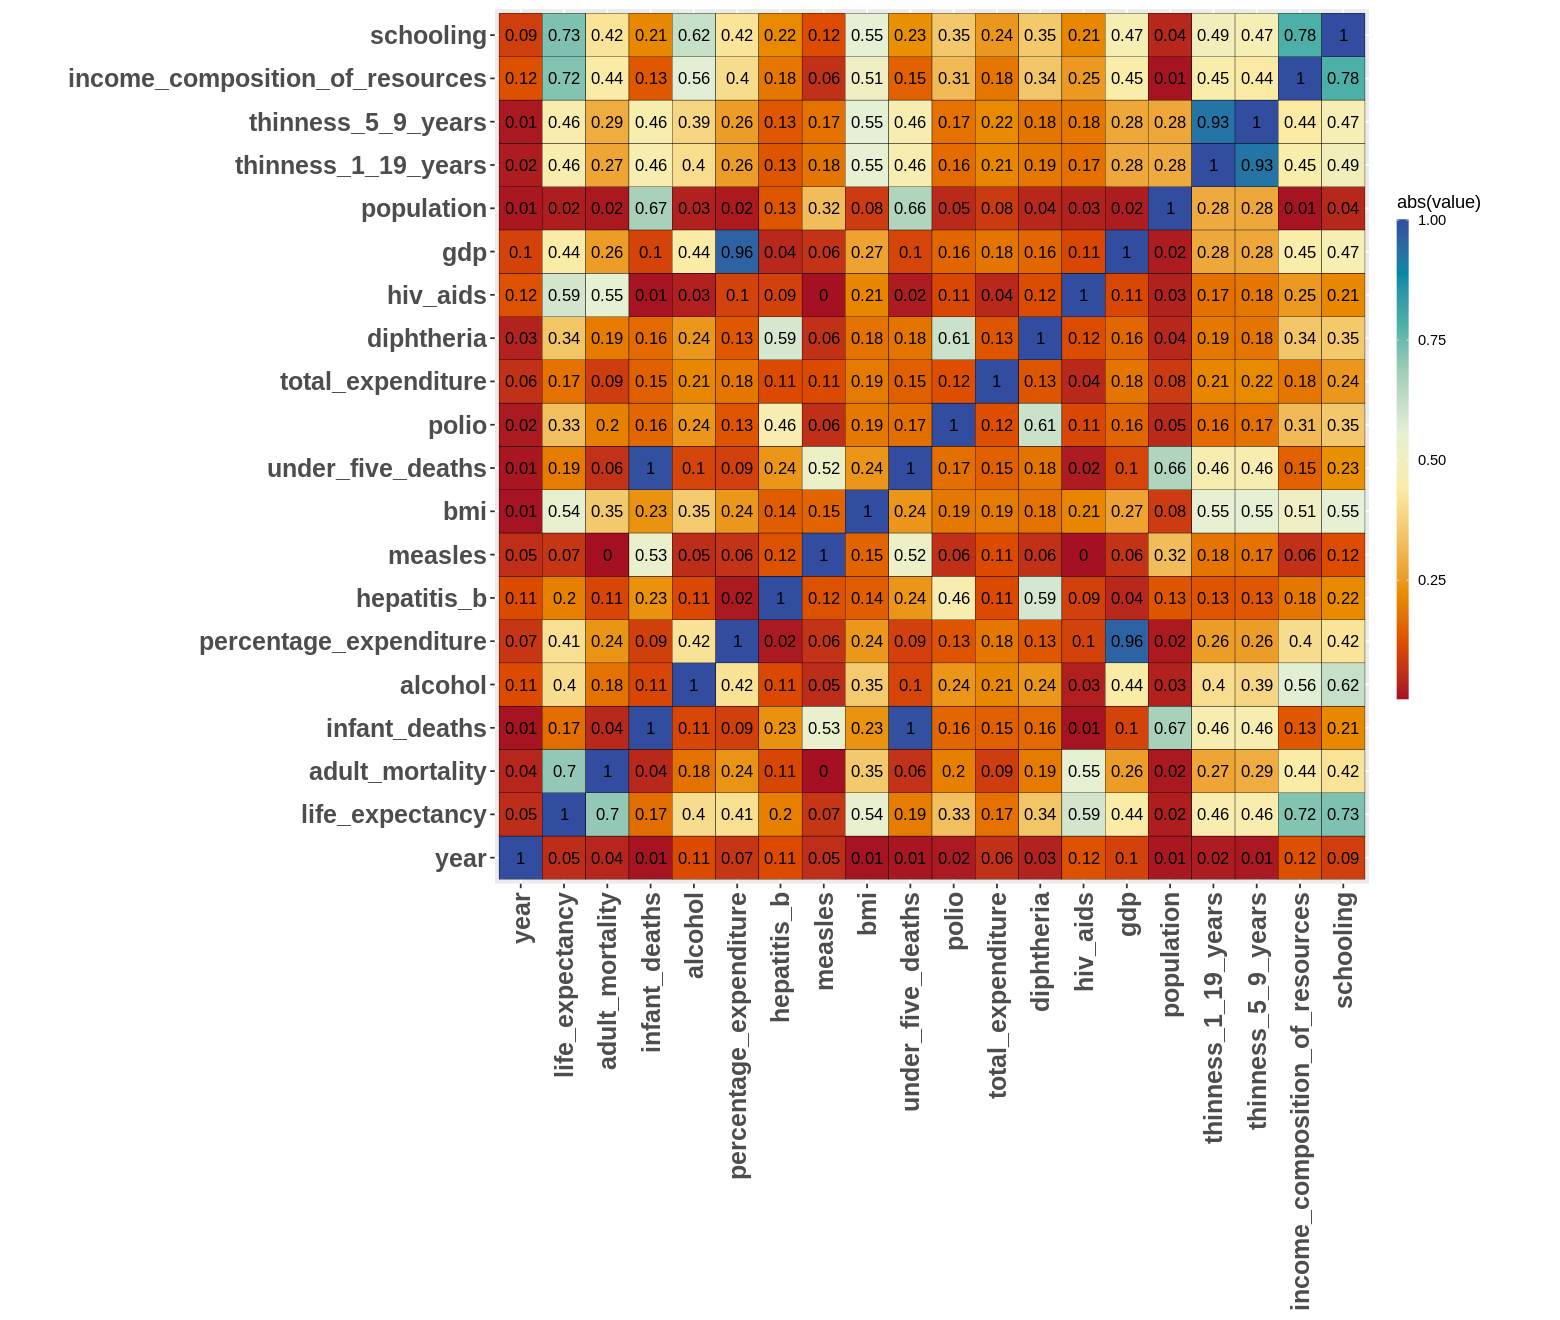

In [11]:
# correlation between numeric variables
cor_matrix <- cor(subset(le, select = -c(country, status) ))
melted <- melt(cor_matrix)

# Make plots larger 
options(repr.plot.width=13, repr.plot.height=11)

ggplot(melted) +
    geom_tile(aes(X1, X2, fill=abs(value)), colour = "black") + 
    geom_text(aes(X1, X2, label = abs(round(value,2))), color = "black", size = 3.5) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), 
          axis.text=element_text(size=15, face="bold"), 
          axis.title=element_blank()) +
    scale_fill_gradientn(colors = hcl.colors(10, "RdYlBu"))+
    coord_fixed() +
    guides(fill = guide_colourbar(barwidth = 0.5, barheight = 20))
# TODO: change pallete to look prettier https://r-graph-gallery.com/79-levelplot-with-ggplot2.html

TODO: pick one of the two

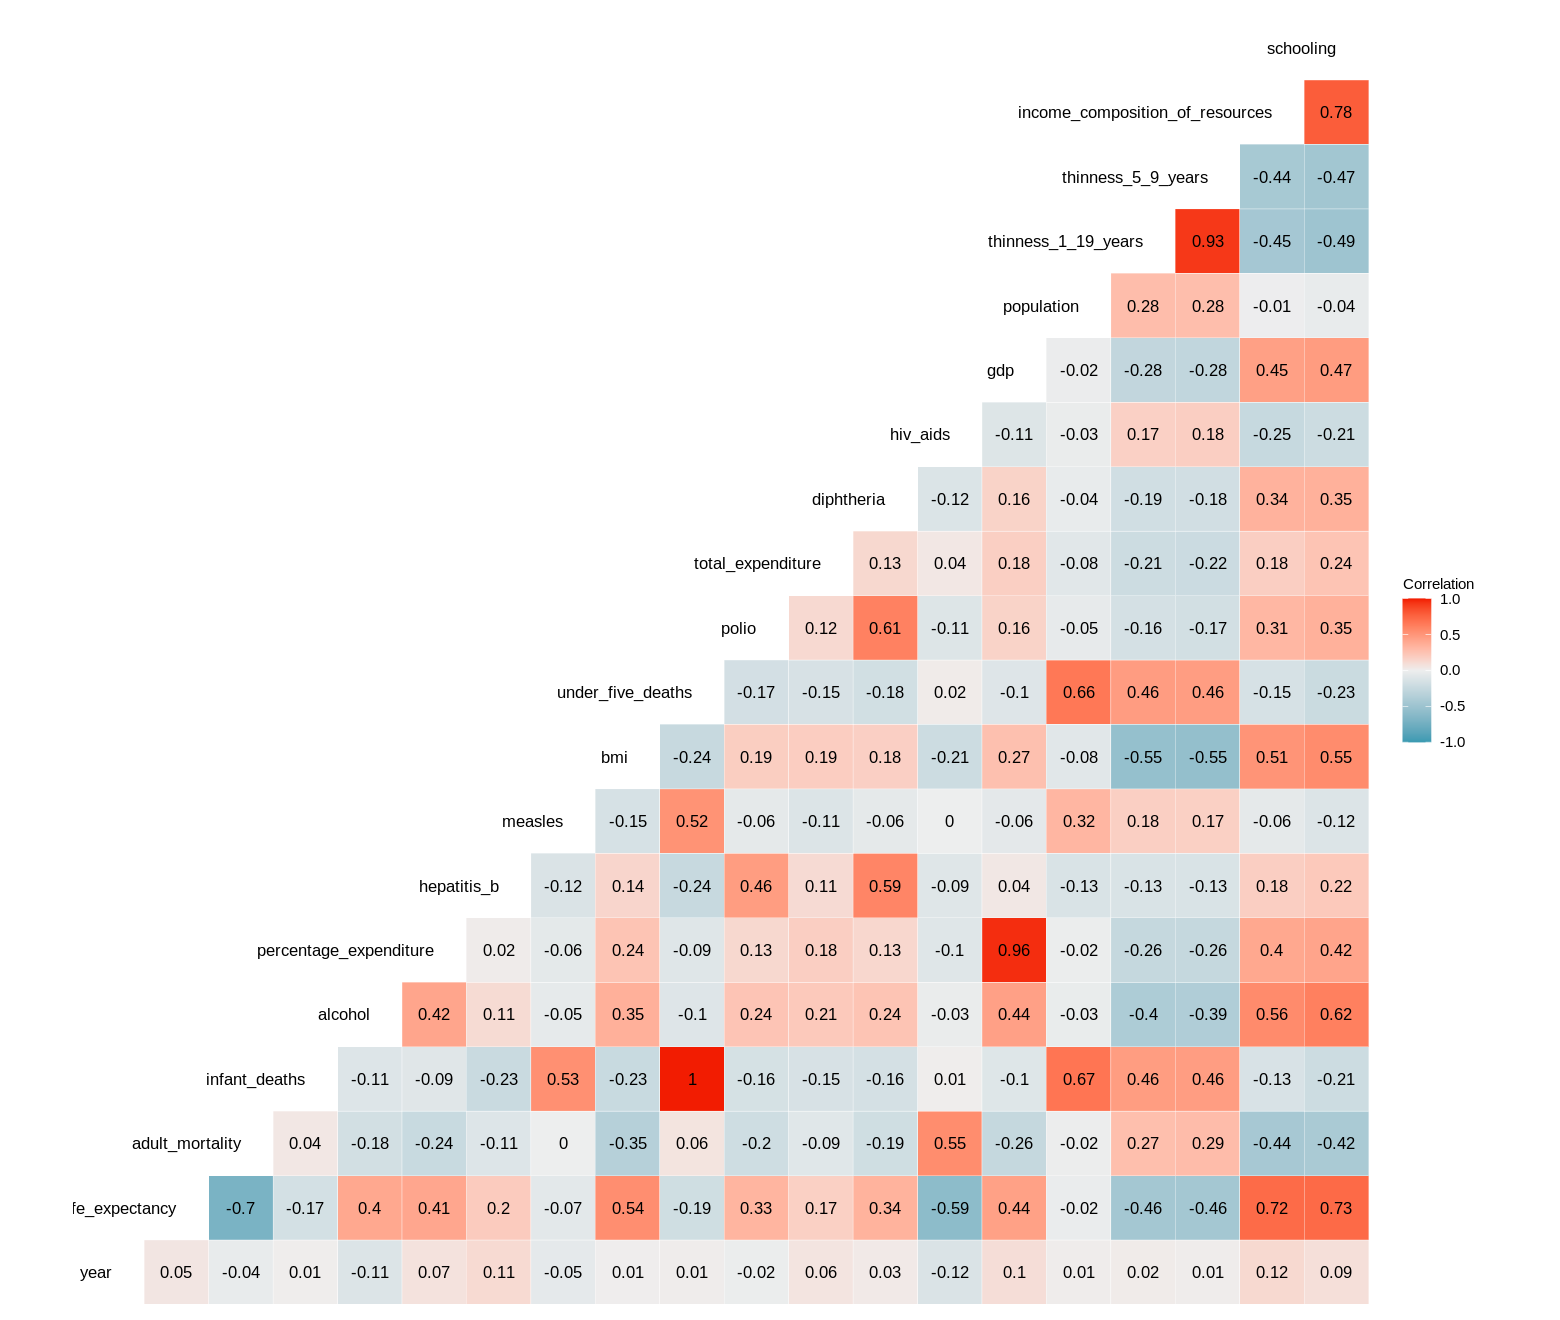

In [12]:
# Or alternatively, 
le %>% select_if(is.numeric) %>% 
    ggcorr( label = T, 
           label_size = 3.5,
           label_round = 2,
           hjust = 1,
           size = 3.5, 
           name = "Correlation")

### 2.3 Data Visualizations

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



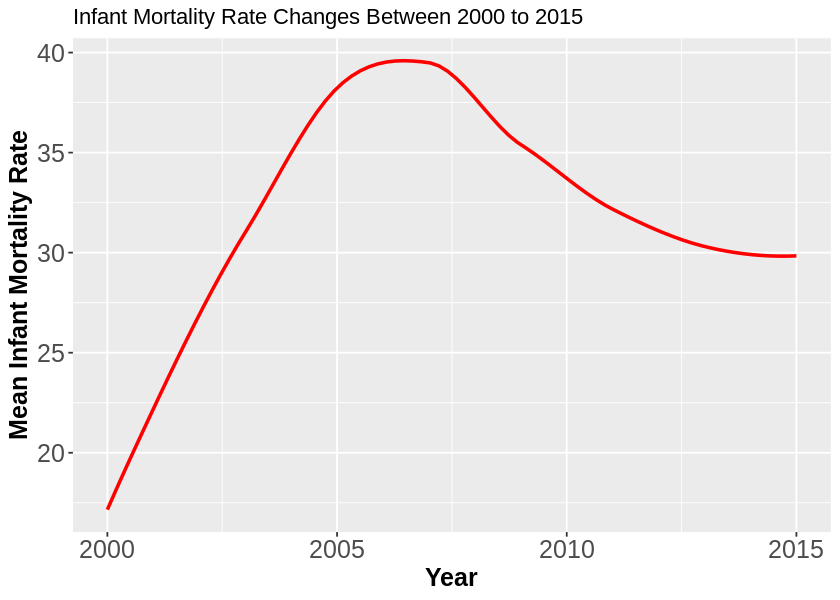

In [13]:
options(repr.plot.width=7, repr.plot.height=5)
le %>%
    group_by(year) %>% 
    summarize(mean_adult_mortality=mean(adult_mortality),
             mean_infant_deaths=mean(infant_deaths)) %>% 
    ggplot() +
        #geom_smooth(aes(year, mean_adult_mortality), color='blue', se=FALSE)+
        geom_smooth(aes(year, mean_infant_deaths), color='red', se=FALSE) + 
        theme(axis.text=element_text(size=15), 
              axis.title=element_text(size=15, face="bold"))+
        labs(title = "Infant Mortality Rate Changes Between 2000 to 2015", 
             x = "Year", y = "Mean Infant Mortality Rate")
# TODO: change axis title to be more readable
# TODO: explain the graph

`geom_smooth()` using formula 'y ~ x'



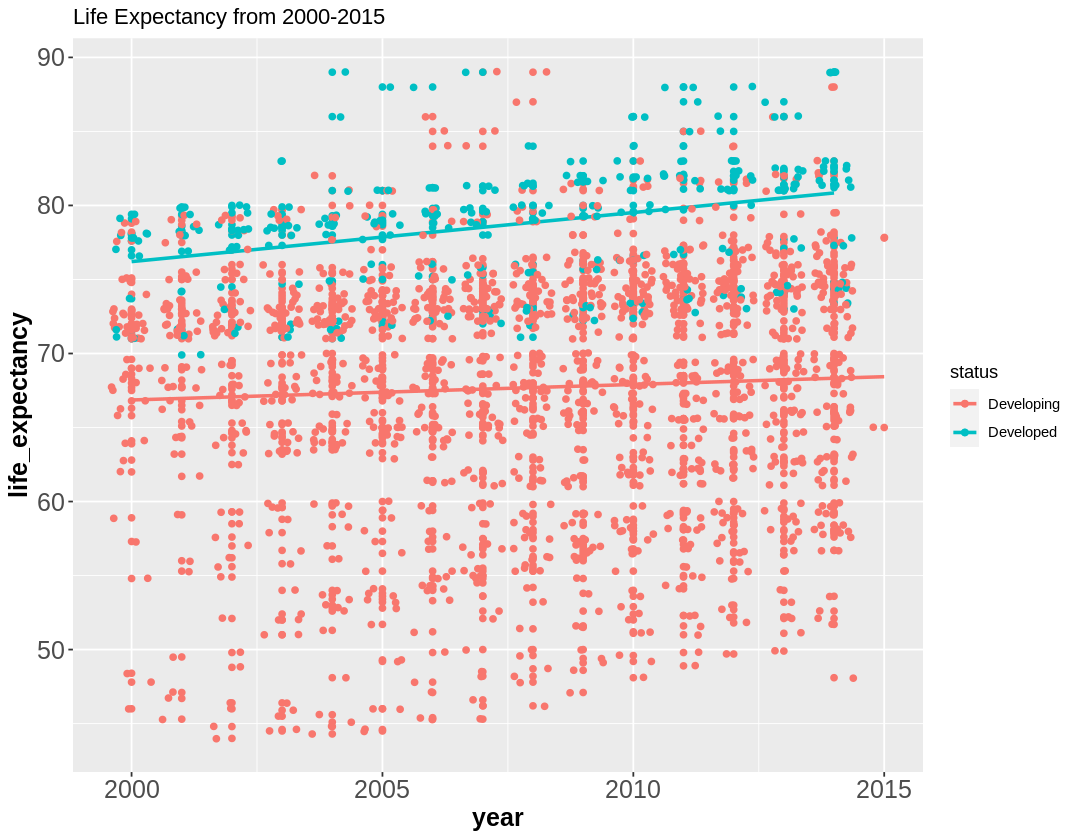

In [14]:
options(repr.plot.width=9, repr.plot.height=7)
le %>% ggplot(mapping=aes(year,life_expectancy, color=status)) + 
    geom_point() + 
    geom_smooth(method="lm",se=FALSE) + 
    labs(title="Life Expectancy from 2000-2015") + 
    theme(axis.text=element_text(size=15), 
    axis.title=element_text(size=15, face="bold")) + 
    geom_jitter()
# TODO: change axis title to be more readable
# TODO: explain the graph

`geom_smooth()` using formula 'y ~ x'



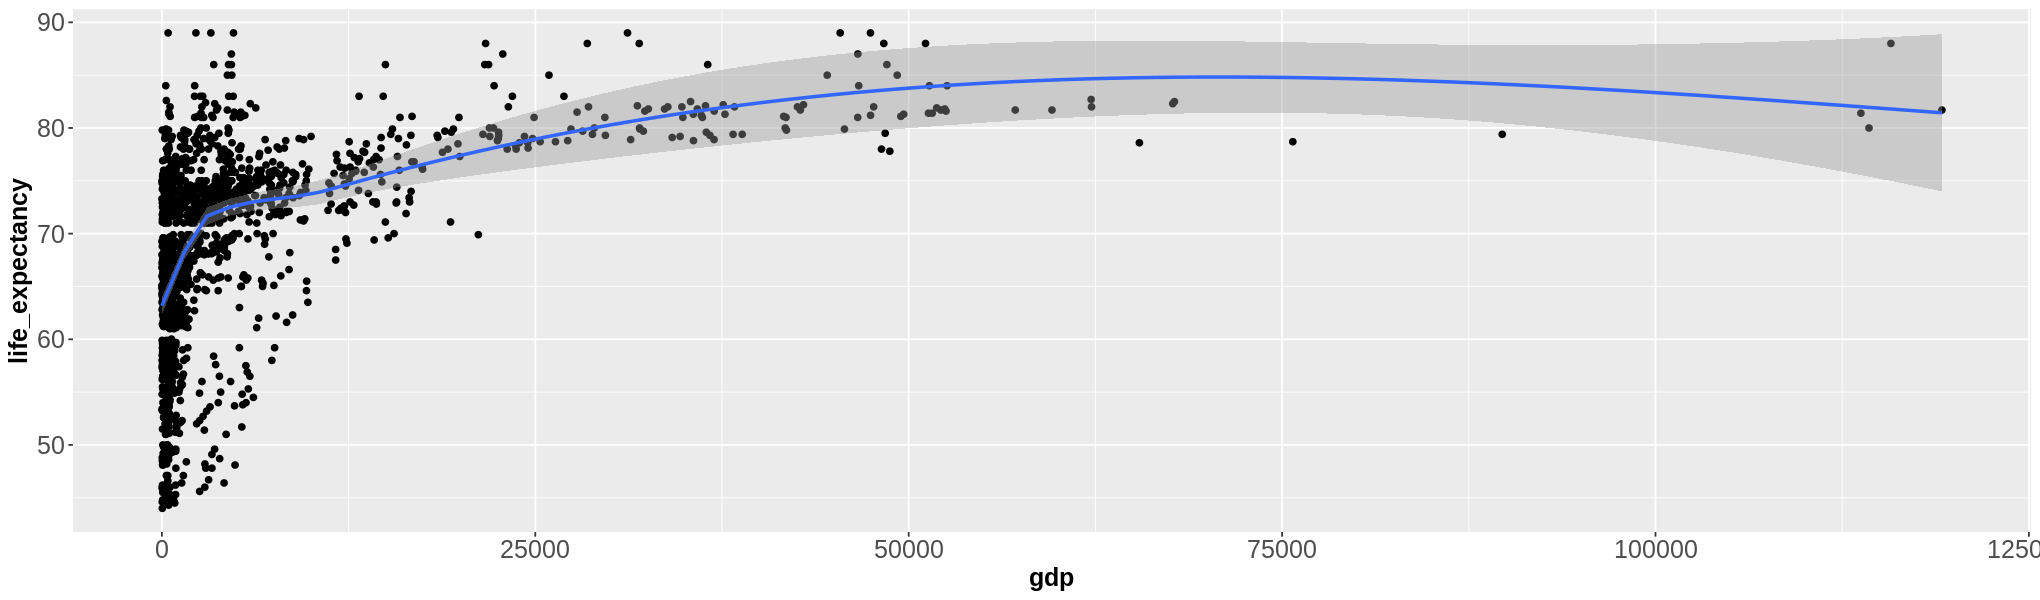

In [15]:
options(repr.plot.width=17, repr.plot.height=5)
le %>% ggplot(mapping = aes(gdp, life_expectancy)) + 
    geom_point() + 
    geom_smooth(method="loess") + # https://rdrr.io/r/stats/loess.html
    theme(axis.text=element_text(size=15), 
    axis.title=element_text(size=15, face="bold"))
# TODO: change axis title to be more readable
# TODO: explain the graph

`geom_smooth()` using formula 'y ~ x'



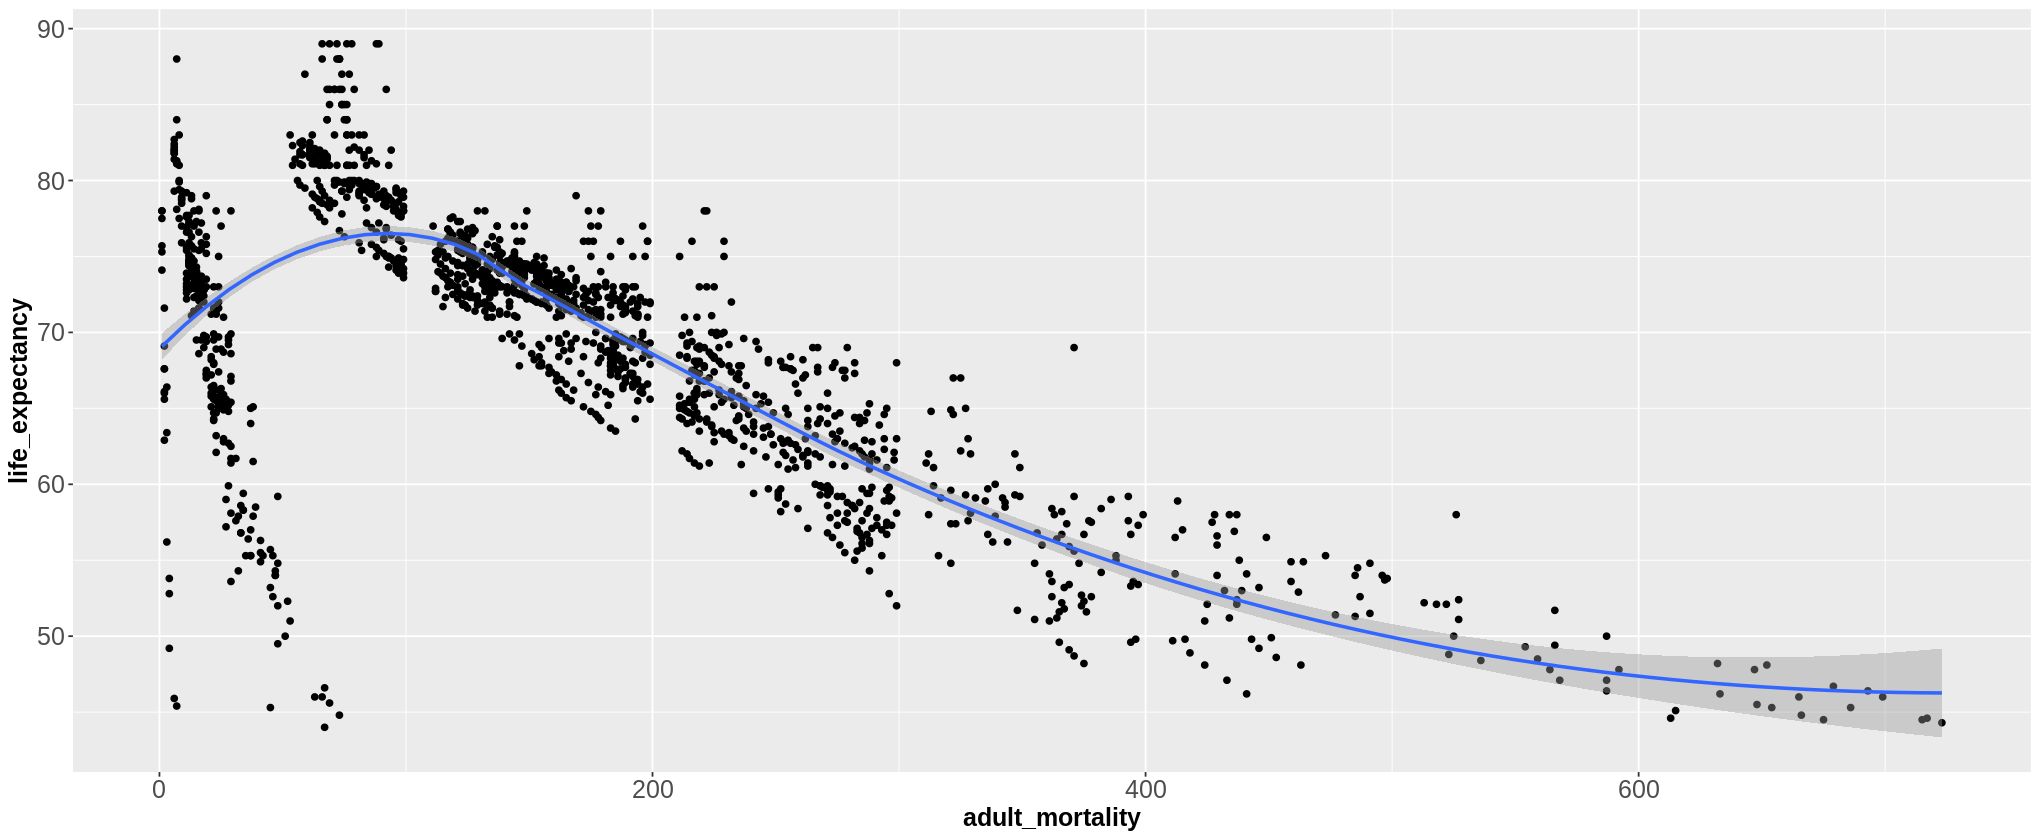

In [16]:
options(repr.plot.width=17, repr.plot.height=7)
le %>% ggplot(mapping = aes(adult_mortality, life_expectancy)) + 
    geom_point() + 
    geom_smooth(method="loess") + # https://rdrr.io/r/stats/loess.html
    theme(axis.text=element_text(size=15), 
    axis.title=element_text(size=15, face="bold"))
# TODO: change axis title to be more readable
# TODO: explain the graph
# TODO: why the data scattered apart? 

`geom_smooth()` using formula 'y ~ x'



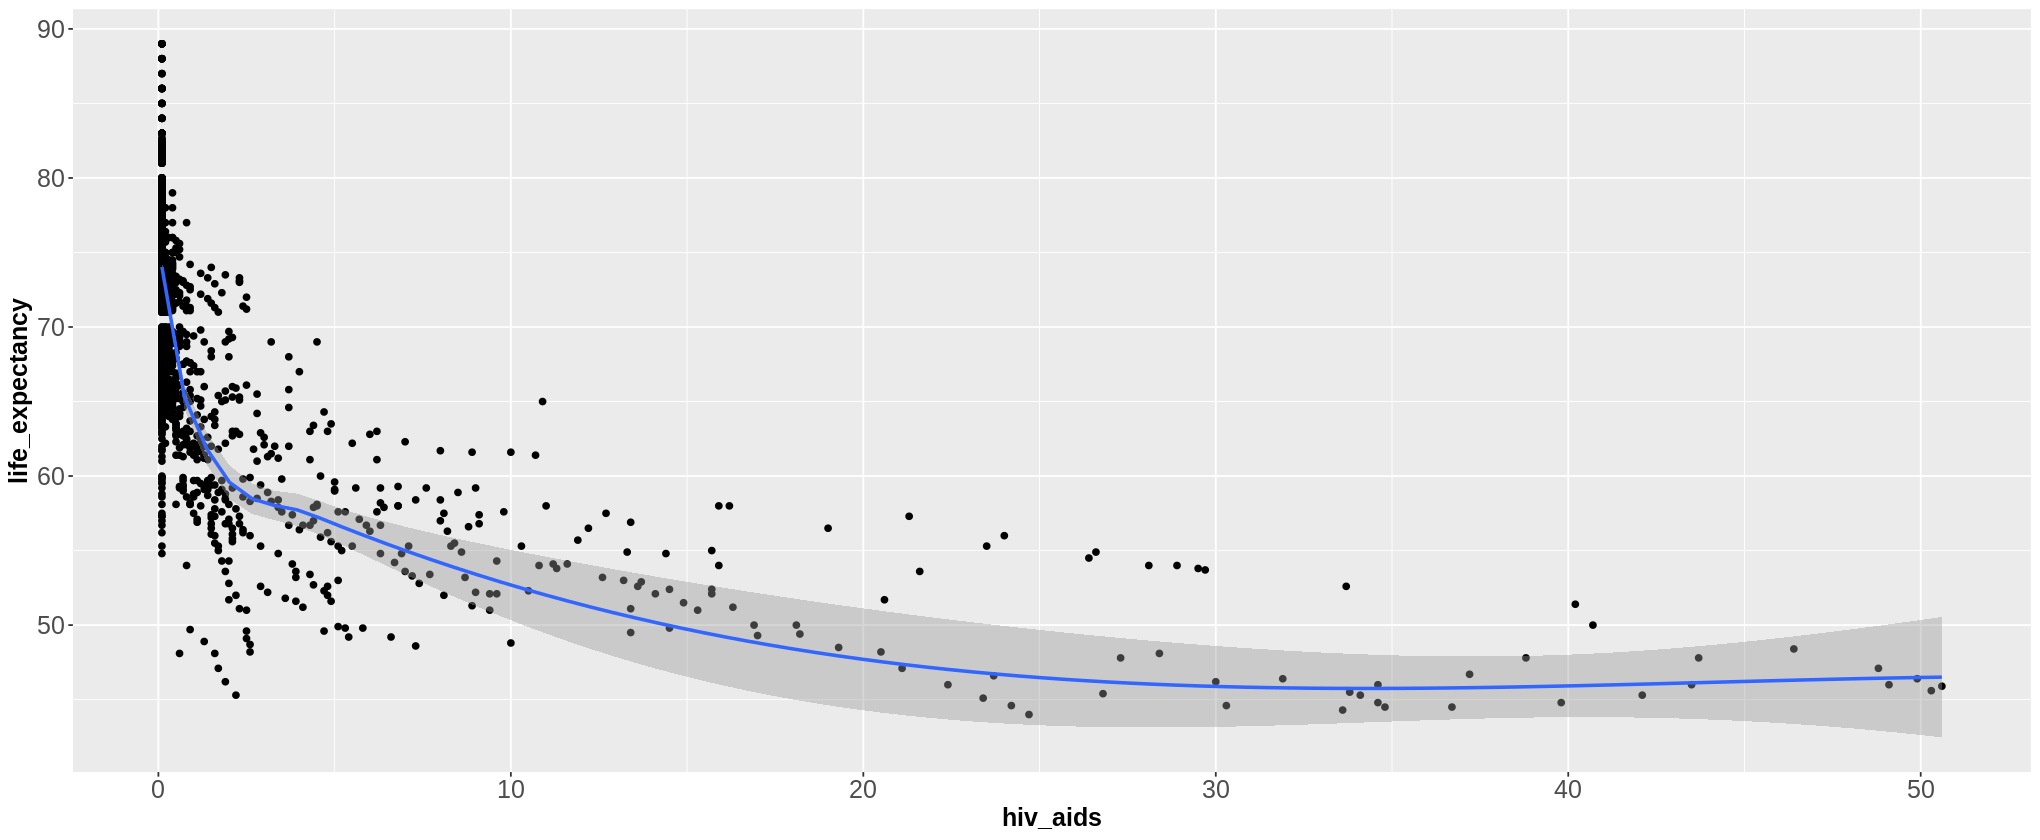

In [17]:
options(repr.plot.width=17, repr.plot.height=7)
le %>% ggplot(mapping=aes(hiv_aids,life_expectancy)) + 
    geom_point() + 
    geom_smooth(method="loess") + # https://rdrr.io/r/stats/loess.html
    theme(axis.text=element_text(size=15), 
    axis.title=element_text(size=15, face="bold"))
# TODO: change axis title to be more readable
# TODO: explain the graph

`geom_smooth()` using formula 'y ~ x'



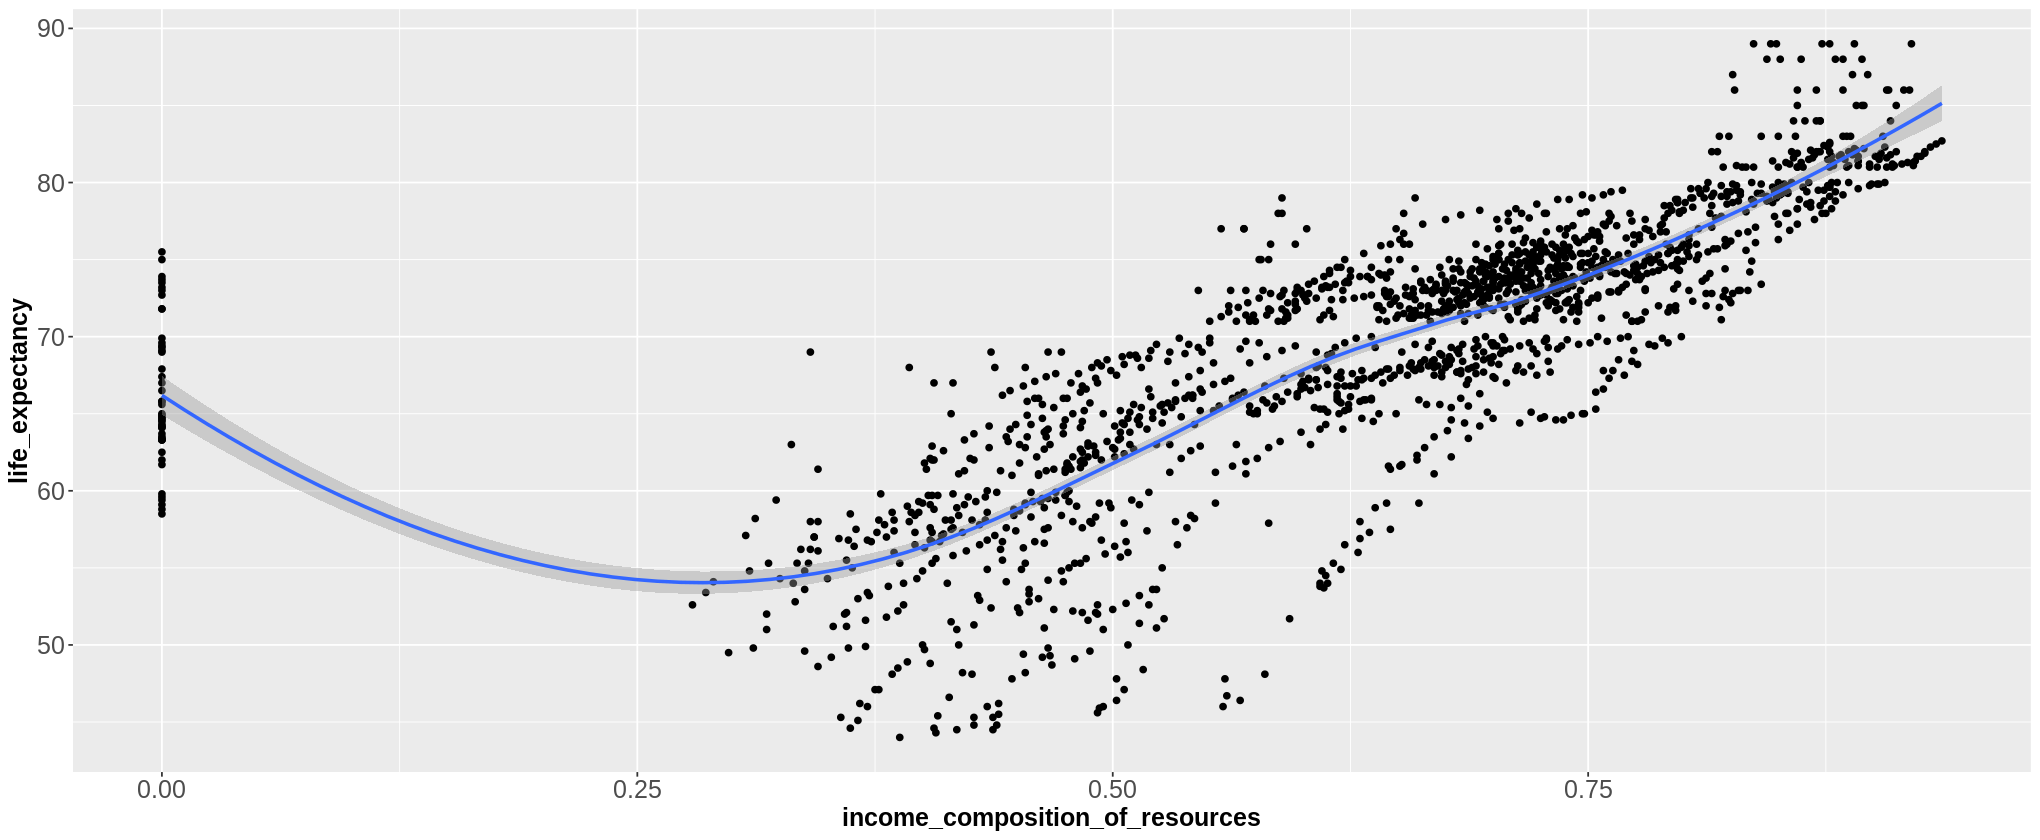

In [18]:
options(repr.plot.width=17, repr.plot.height=7)
le %>% ggplot(mapping=aes(income_composition_of_resources,life_expectancy)) + 
    geom_point() + 
    geom_smooth(method="loess") + # https://rdrr.io/r/stats/loess.html
    theme(axis.text=element_text(size=15), 
    axis.title=element_text(size=15, face="bold")) 
# TODO: change axis title to be more readable
# TODO: explain the graph

`geom_smooth()` using formula 'y ~ x'



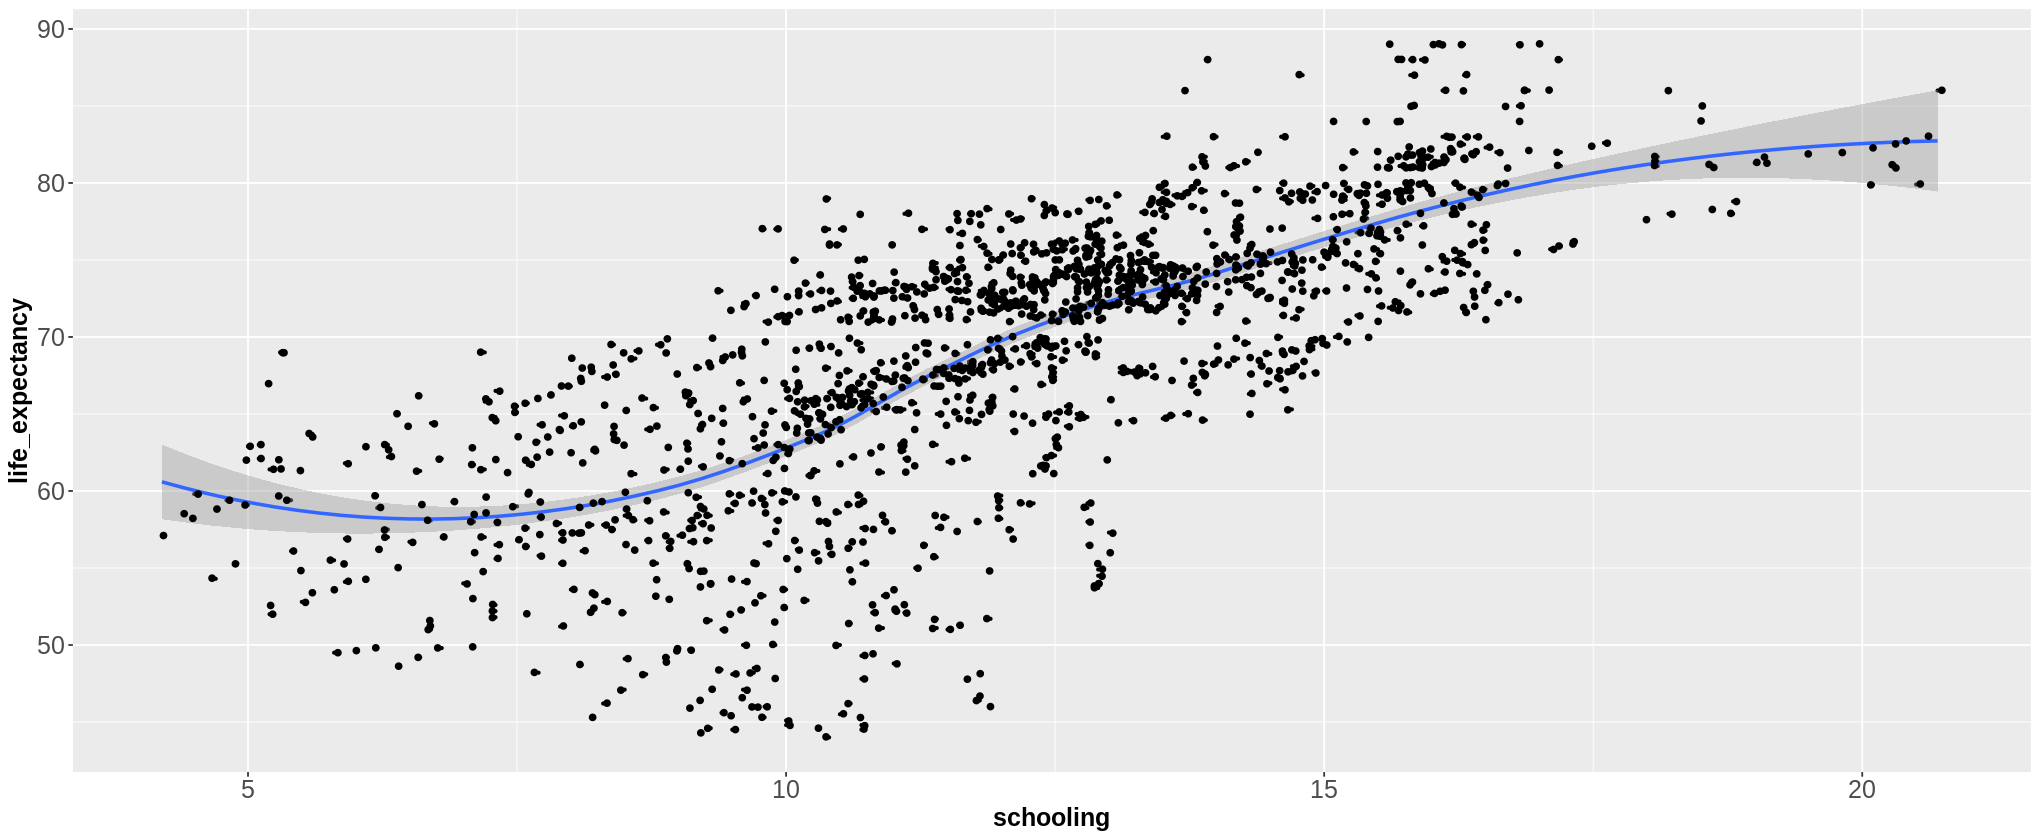

In [19]:
options(repr.plot.width=17, repr.plot.height=7)
le %>% ggplot(mapping=aes(schooling,life_expectancy)) + 
    geom_point(size = 0.5) + 
    geom_smooth(method="loess") + # https://rdrr.io/r/stats/loess.html
    theme(axis.text=element_text(size=15), 
    axis.title=element_text(size=15, face="bold")) + 
    geom_jitter()
# TODO: change axis title to be more readable
# TODO: explain the graph

`geom_smooth()` using formula 'y ~ x'



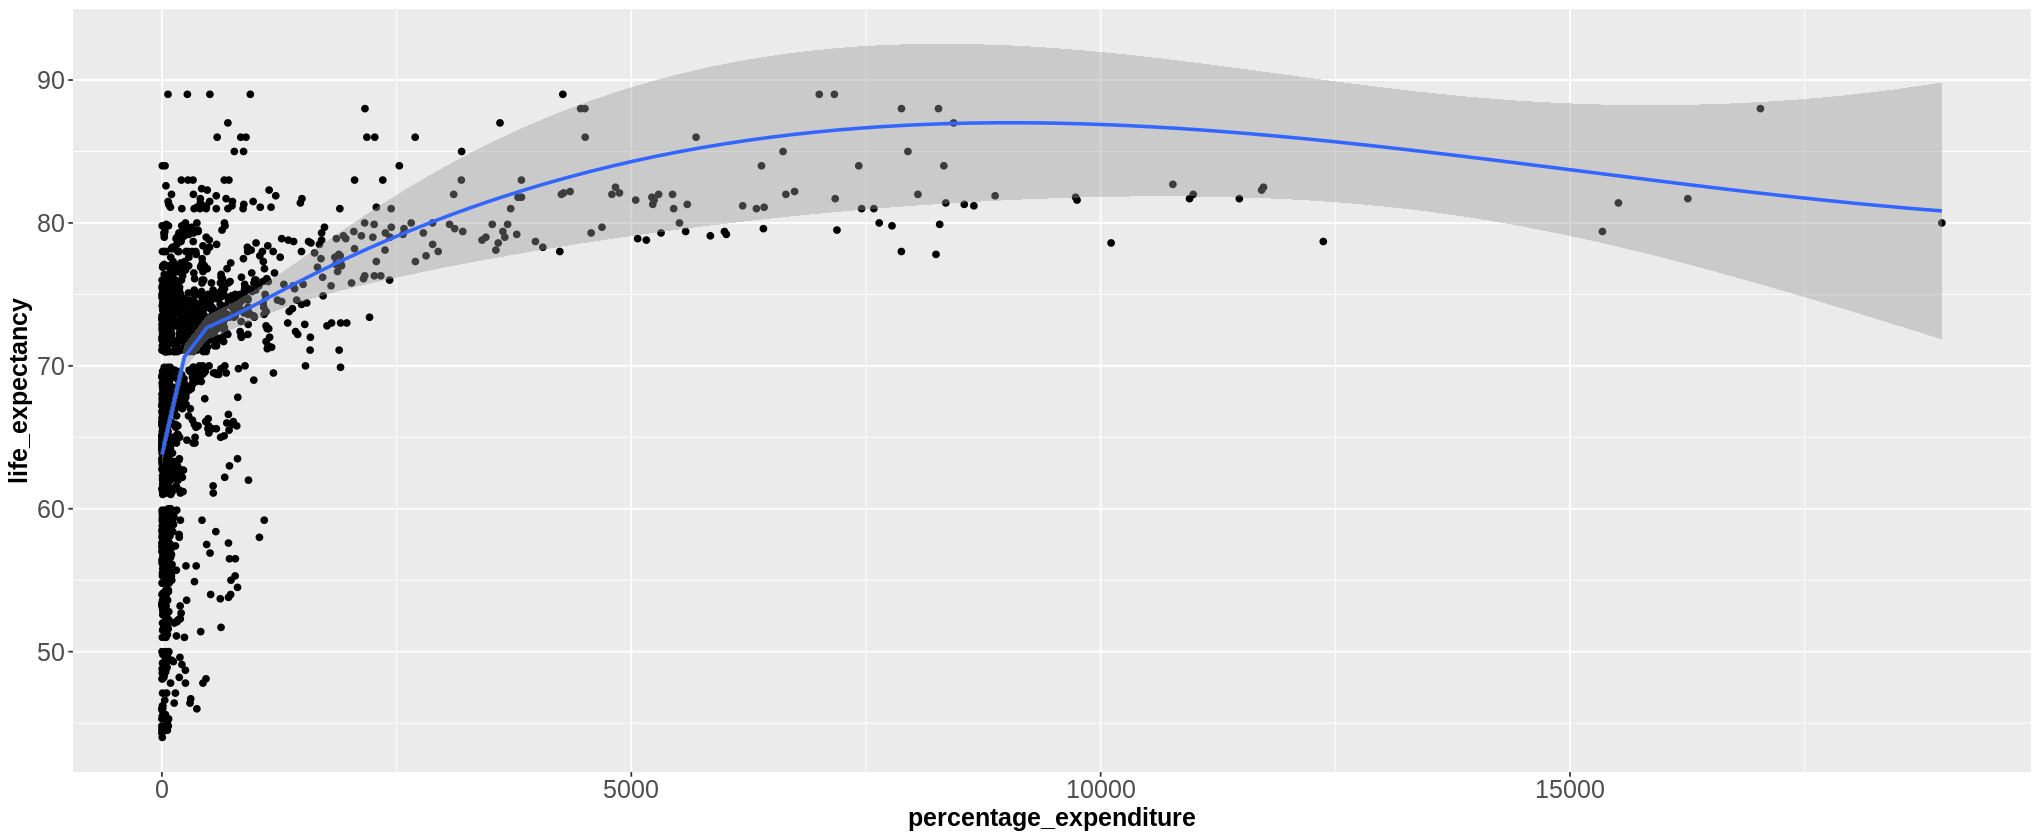

In [20]:
options(repr.plot.width=17, repr.plot.height=7)
le %>% ggplot(mapping = aes(percentage_expenditure, life_expectancy)) + 
    geom_point() + 
    geom_smooth(method="loess") + # https://rdrr.io/r/stats/loess.html
    theme(axis.text=element_text(size=15), 
    axis.title=element_text(size=15, face="bold"))
# TODO: change axis title to be more readable
# TODO: explain the graph
# TODO: why the data scattered apart? 

`geom_smooth()` using formula 'y ~ x'



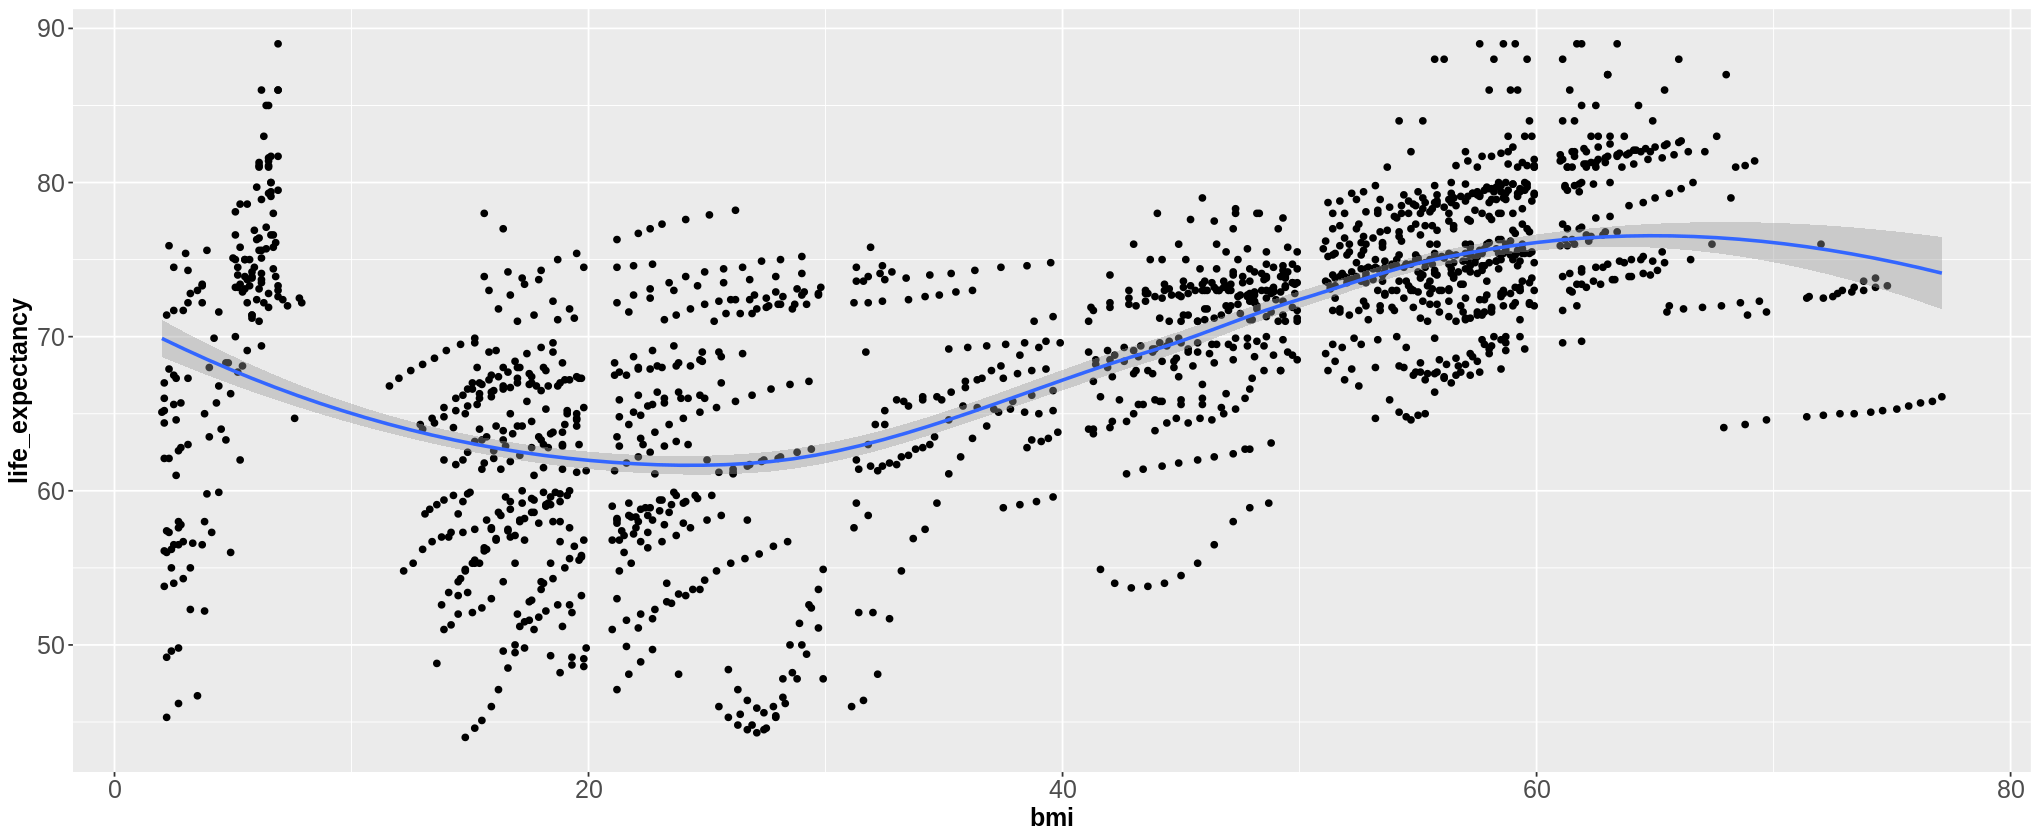

In [21]:
options(repr.plot.width=17, repr.plot.height=7)
le %>% ggplot(mapping=aes(bmi,life_expectancy)) + 
    geom_point() + 
    geom_smooth(method="loess") + # https://rdrr.io/r/stats/loess.html
    theme(axis.text=element_text(size=15), 
    axis.title=element_text(size=15, face="bold")) 
# TODO: change axis title to be more readable
# TODO: explain the graph

TODO: select a couple of plots and to explain

### 2.4 Variable Selection (for the report part)

In [22]:
# TODO: Split into training&testing set
# TODO: Forward Selection modelling
le_split <- initial_split(le, prop = 0.75, strata = status)
le_train <- training(le_split)
le_test <- testing(le_split)

In [23]:
# Extract the column names for the full set of predictor variables, excluding life_expectancy, which is our response variable
names <- colnames(select(le, -life_expectancy))
names

[1] "country"                         "year"                           
 [3] "status"                          "adult_mortality"                
 [5] "infant_deaths"                   "alcohol"                        
 [7] "percentage_expenditure"          "hepatitis_b"                    
 [9] "measles"                         "bmi"                            
[11] "under_five_deaths"               "polio"                          
[13] "total_expenditure"               "diphtheria"                     
[15] "hiv_aids"                        "gdp"                            
[17] "population"                      "thinness_1_19_years"            
[19] "thinness_5_9_years"              "income_composition_of_resources"
[21] "schooling"

In [24]:
le_forward_sel <- regsubsets(
  x =  life_expectancy ~ ., nvmax = 20,
  data = select(le_train, -country),
  method = "forward"
)

le_forward_summary <- summary(le_forward_sel)
le_forward_summary

Subset selection object
Call: regsubsets.formula(x = life_expectancy ~ ., nvmax = 20, data = select(le_train, 
    -country), method = "forward")
20 Variables  (and intercept)
                                Forced in Forced out
year                                FALSE      FALSE
statusDeveloped                     FALSE      FALSE
adult_mortality                     FALSE      FALSE
infant_deaths                       FALSE      FALSE
alcohol                             FALSE      FALSE
percentage_expenditure              FALSE      FALSE
hepatitis_b                         FALSE      FALSE
measles                             FALSE      FALSE
bmi                                 FALSE      FALSE
under_five_deaths                   FALSE      FALSE
polio                               FALSE      FALSE
total_expenditure                   FALSE      FALSE
diphtheria                          FALSE      FALSE
hiv_aids                            FALSE      FALSE
gdp                          

TODO: reason that we should exclude `country` in the model

In [25]:
le_forward_summary_df <- tibble(
    n_input_variables = 1:20,
    RSQ = le_forward_summary$rsq,
    RSS = le_forward_summary$rss,
    ADJ.R2 = le_forward_summary$adjr2,
    Cp = le_forward_summary$cp,
    BIC = le_forward_summary$bic)
le_forward_summary_df

n_input_variables,RSQ,RSS,ADJ.R2,Cp,BIC
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.5262717,44309.00,0.5258878,2196.95975,-909.2027
2,0.7231702,25892.59,0.7227211,773.76099,-1566.1006
3,0.7760858,20943.26,0.7755406,392.74489,-1821.1861
4,0.7969908,18987.97,0.7963311,243.42974,-1935.2086
5,0.8031699,18410.02,0.8023697,200.70401,-1966.2941
6,0.8094769,17820.10,0.8085468,157.05183,-1999.4284
7,0.8132332,17468.77,0.8121685,131.86349,-2016.9202
8,0.8162274,17188.71,0.8150293,112.19008,-2029.7770
9,0.8192365,16907.27,0.8179095,92.40983,-2043.0629


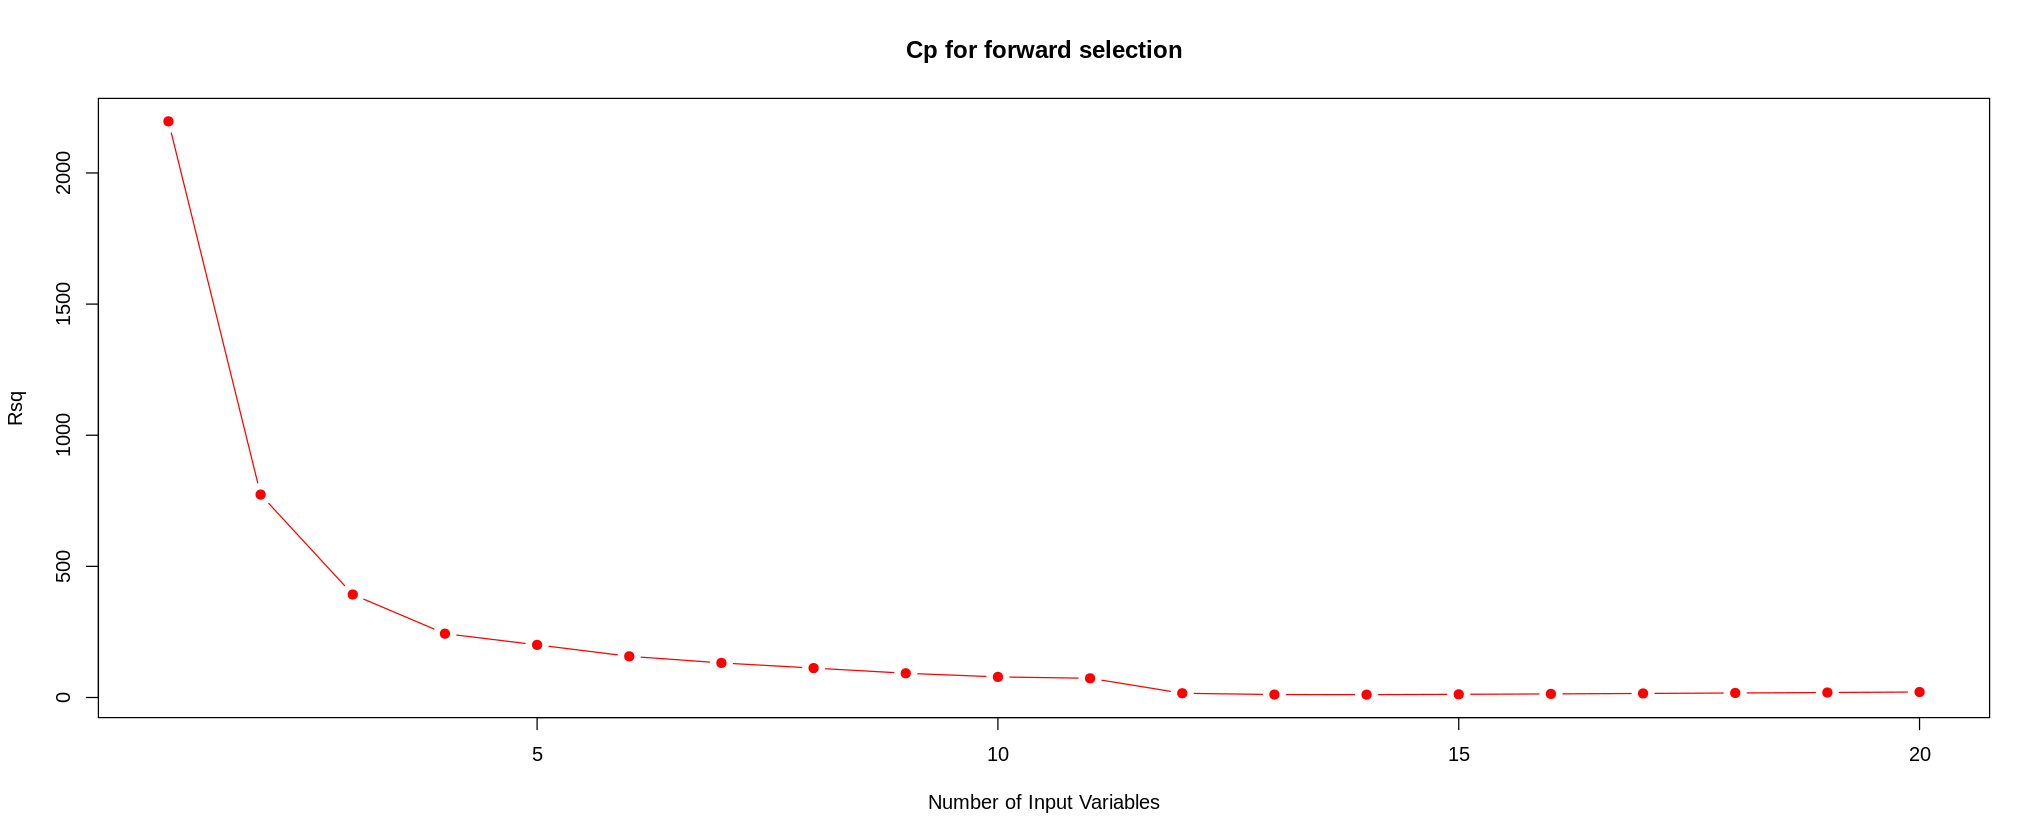

In [26]:
options(repr.plot.width=17, repr.plot.height=7)
plot(summary(le_forward_sel)$cp,
  main = "Cp for forward selection",
  xlab = "Number of Input Variables", ylab = "Rsq", type = "b", pch = 19,
  col = "red"
)

## 3. Methods

- What methods do you plan on using?

We will perform EDA to detect heteroscedasticity and remove multicollinearity. Afterwards, we will split the model into the training set and the testing set with a 75-25 split.

Using the training set, we will perform a forward generative modelling to determine which input variables explain the variance of the error terms the best. Using the same training set, we will create a linear model using the selected input variables in an additive model.

Finally, we will evaluate the performance of the linear model using the testing set.
Stretch Goal: We will also evaluate a linear model using an interactive model, and compare which one is better using an ANOVA test.

- What do you expect to achieve?

Through our analysis, we expect to determine the input variables that predict one’s life expectancy the best, and the extent that the variable affects the predicted life expectancy.

- What impact could your results have?

Our results can be used by life insurance companies to determine the price of insurance plans depending on one’s expected life expectancy.



### 3.1 Strengths

### 3.2 Limitations

### 3.3 Analysis

## 4. Reflection

# <center>References</center>

1. Data Science: A First Introduction. Last updated September 24, 2022. [Source](https://datasciencebook.ca/).